# **Capstone project: Providing data-driven suggestions for HR**
## **Google Advanced Data Analytics Professional Certificate**

### Business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Import packages
*   Load dataset



In [1]:
# Import packages

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load dataset into a dataframe

df0 = pd.read_csv("/kaggle/input/hr-analytics-and-job-prediction/HR_comma_sep.csv")

# Display first few rows of the dataframe

df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration
### Step 2.1. Initial EDA and data cleaning

### Gather basic information

In [3]:
# Gather basic information about the data

df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics

In [4]:
# Gather descriptive statistics about the data

df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

In [5]:
# Display all column names

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed

nameDict={'number_project':'number_projects','average_montly_hours':'avg_monthly_hours','time_spend_company':'years_at_company',
         'Work_accident':'work_accident','left':'left_company','promotion_last_5years':'promoted_5years', 
          'Department':'department','salary':'salary_level'}

df0=df0.rename(columns=nameDict)

# Display all column names after the update

df0.head()

,satisfaction_level,last_evaluation,number_projects,avg_monthly_hours,years_at_company,work_accident,left_company,promoted_5years,department,salary_level
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check missing values

In [7]:
# Check for missing values

df0.isnull().sum()

satisfaction_level    0
last_evaluation       0
number_projects       0
avg_monthly_hours     0
years_at_company      0
work_accident         0
left_company          0
promoted_5years       0
department            0
salary_level          0
dtype: int64

### Check duplicates

In [8]:
# Check for duplicates

df0.duplicated().value_counts()

False    11991
True      3008
dtype: int64

3,008 rows contain duplicates, 25% of the data.

In [9]:
# Inspect some rows containing duplicates

df1 = df0[df0.duplicated()==True]

df1 = df1.sort_values(by=['satisfaction_level','last_evaluation'],ascending=True)

df1.head()

,satisfaction_level,last_evaluation,number_projects,avg_monthly_hours,years_at_company,work_accident,left_company,promoted_5years,department,salary_level
12030,0.09,0.62,6,294,4,0,1,0,accounting,low
14241,0.09,0.62,6,294,4,0,1,0,accounting,low
12071,0.09,0.77,5,275,4,0,1,0,product_mng,medium
12652,0.09,0.77,6,290,4,0,1,0,technical,medium
14282,0.09,0.77,5,275,4,0,1,0,product_mng,medium


In [10]:
# Drop duplicates, because they don't seem legitimate data, but just mistakes

df2 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe

df2.duplicated().value_counts()

False    11991
dtype: int64

In [11]:
df2.head()

,satisfaction_level,last_evaluation,number_projects,avg_monthly_hours,years_at_company,work_accident,left_company,promoted_5years,department,salary_level
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

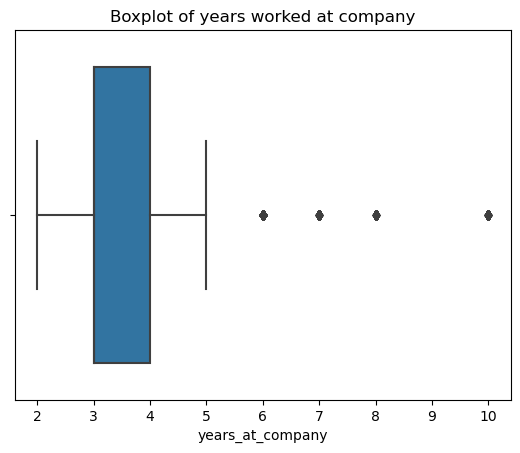

In [12]:
# Create a boxplot to visualize distribution of years_at _company

sns.boxplot(x=df2['years_at_company'])
plt.title('Boxplot of years worked at company')
plt.show()

In [13]:
# Define lower and upper limits for outliers

percentile25 = df2['years_at_company'].quantile(0.25)
percentile75 = df2['years_at_company'].quantile(0.75)
iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print('Upper limit is: ', upper_limit)
print('Lower limit is: ', lower_limit)

Upper limit is:  5.5
Lower limit is:  1.5


In [14]:
df3=df2[df2['years_at_company']>=5.5]
df3.shape

(824, 10)

There are 824 outliers in years_at_company. Certain types of models are more sensitive to outliers, so deleting them will depend on the chosen model.

### Step 2.2. DEA and visualizations

In [15]:
# Get numbers of employees who left vs. stayed

df2['left_company'].value_counts()

# Get percentages of people who left vs. stayed

df2['left_company'].value_counts(normalize=True)*100

0    83.39588
1    16.60412
Name: left_company, dtype: float64

83.40% of employees left the company, 16.60% stayed.

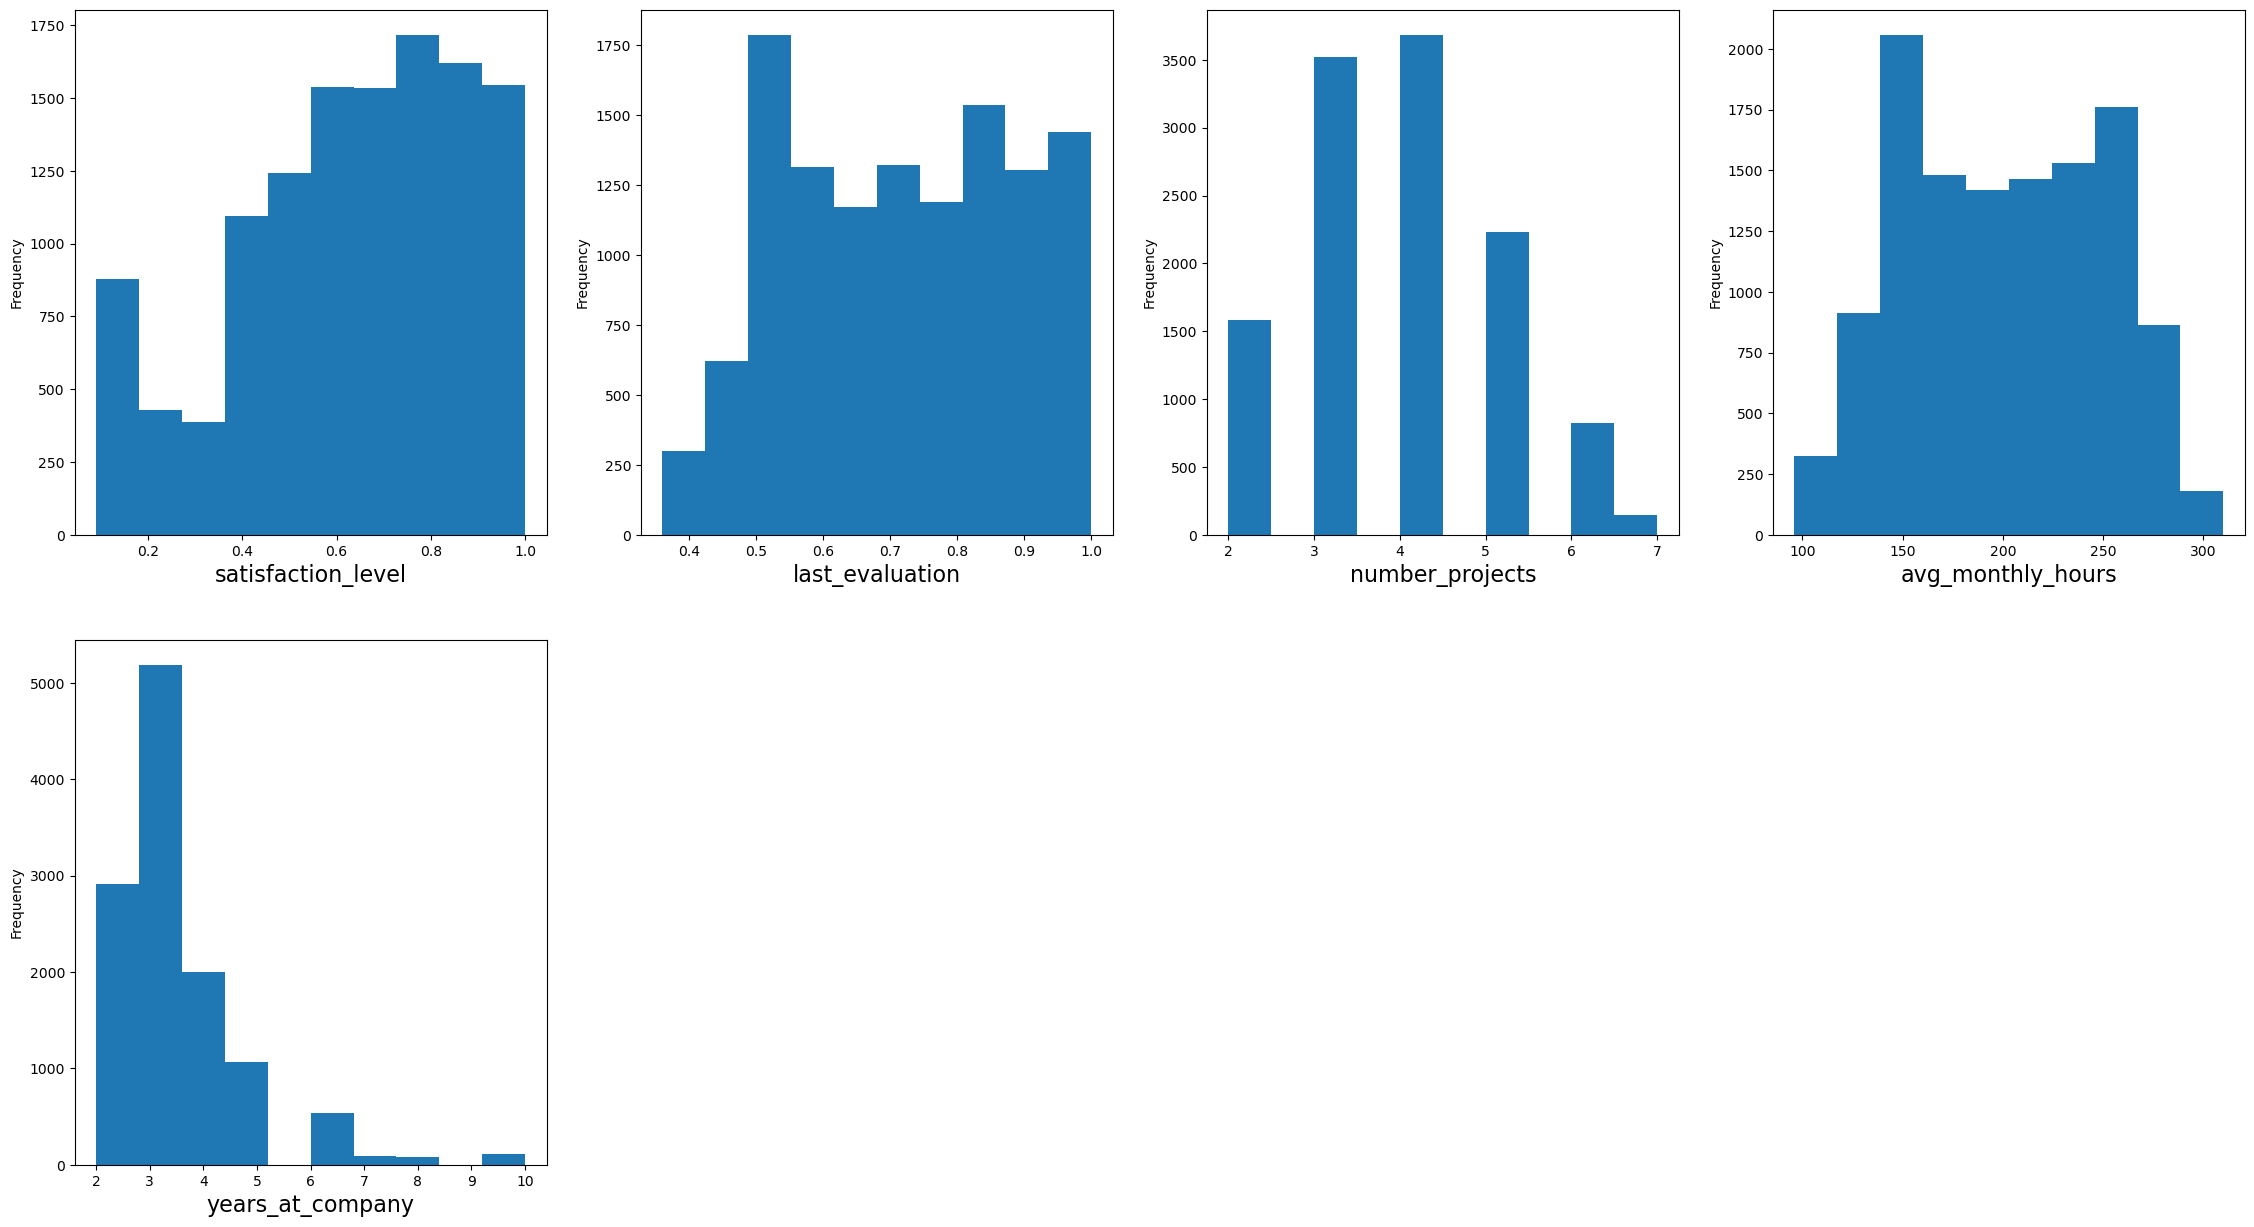

In [16]:
# Histograms 
# Numeric variables

num_list = ['satisfaction_level', 'last_evaluation', 'number_projects','avg_monthly_hours', 'years_at_company']
fig = plt.figure(figsize=(28,15))

i=0
for i in range(len(num_list)):
    column = num_list[i]
    sub = fig.add_subplot(2, 4, i + 1)
    sub.set_xlabel(column, fontsize=16)
    df2[column].plot(kind='hist')
    i = i + 1

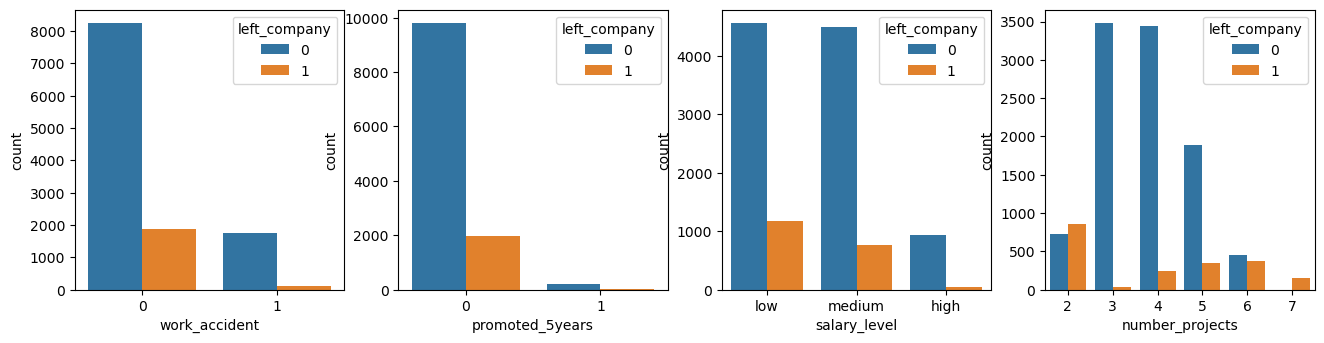

In [17]:
# Bar plots
# Categorical variables

cat_list = ['work_accident', 'promoted_5years','salary_level', 'number_projects']
fig = plt.figure(figsize = (16,8))

for i in range(len(cat_list)):
    column = cat_list[i]
    sub = fig.add_subplot(2, 4, i + 1)
    chart = sns.countplot(data=df2, x=column, hue='left_company', palette = 'tab10')

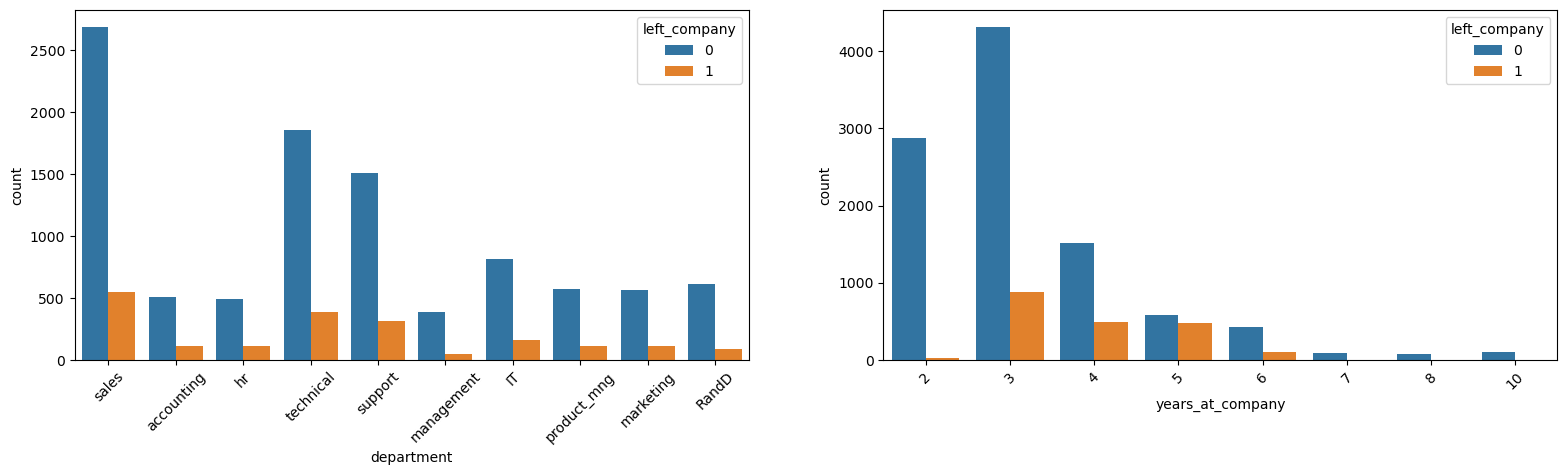

In [18]:
# Bar plots
# Categorical variables

cat_list = ['department', 'years_at_company']
fig = plt.figure(figsize = (40,10))

for i in range(len(cat_list)):
    column = cat_list[i]
    sub = fig.add_subplot(2, 4, i + 1)
    plt.xticks(rotation=45)
    chart = sns.countplot(data=df2, x=column, hue='left_company', palette = 'tab10')

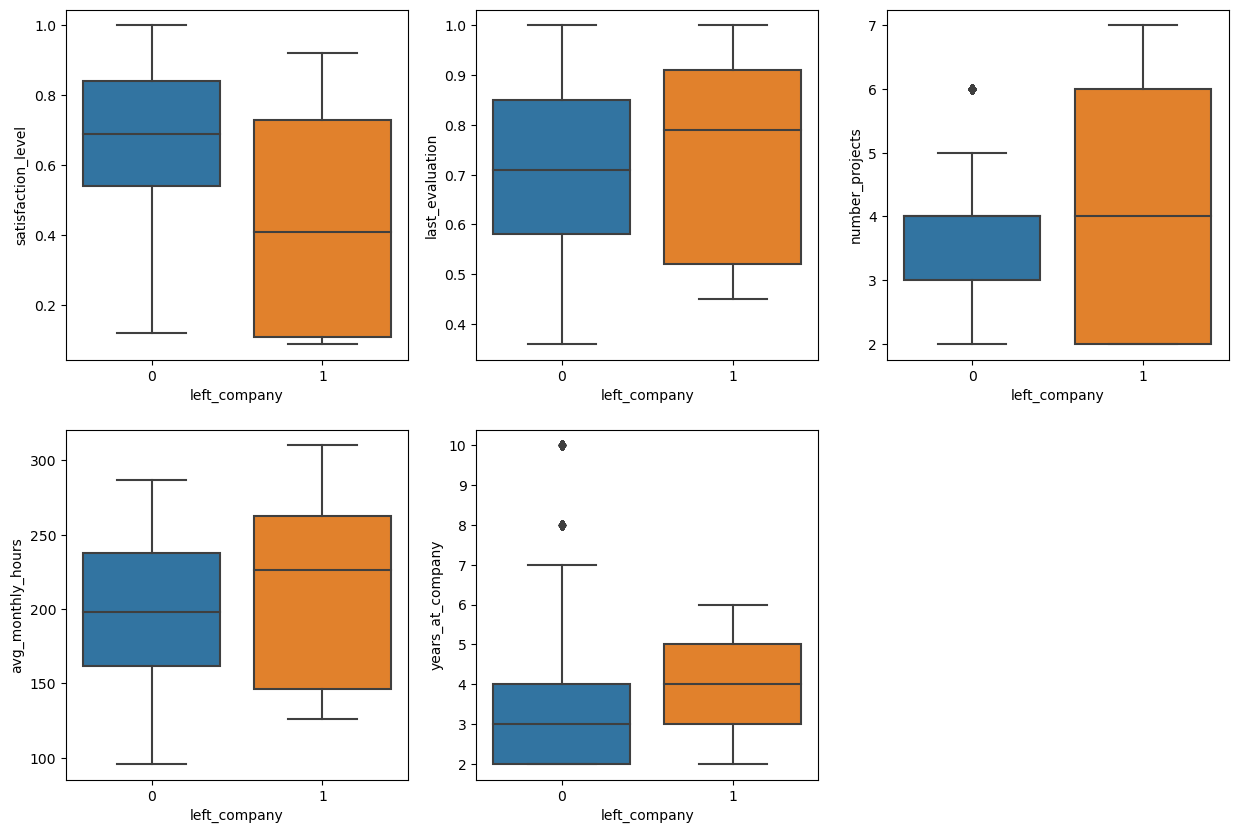

In [19]:
# Box plots
# Categorical vs Numeric

num_list2 = ['satisfaction_level', 'last_evaluation', 'number_projects','avg_monthly_hours', 'years_at_company']
fig = plt.figure(figsize = (15, 10))

for i in range(len(num_list2)):
    column = num_list2[i]
    sub = fig.add_subplot(2, 3, i + 1)
    sns.boxplot( x = 'left_company', y = column, data=df2, palette='tab10')

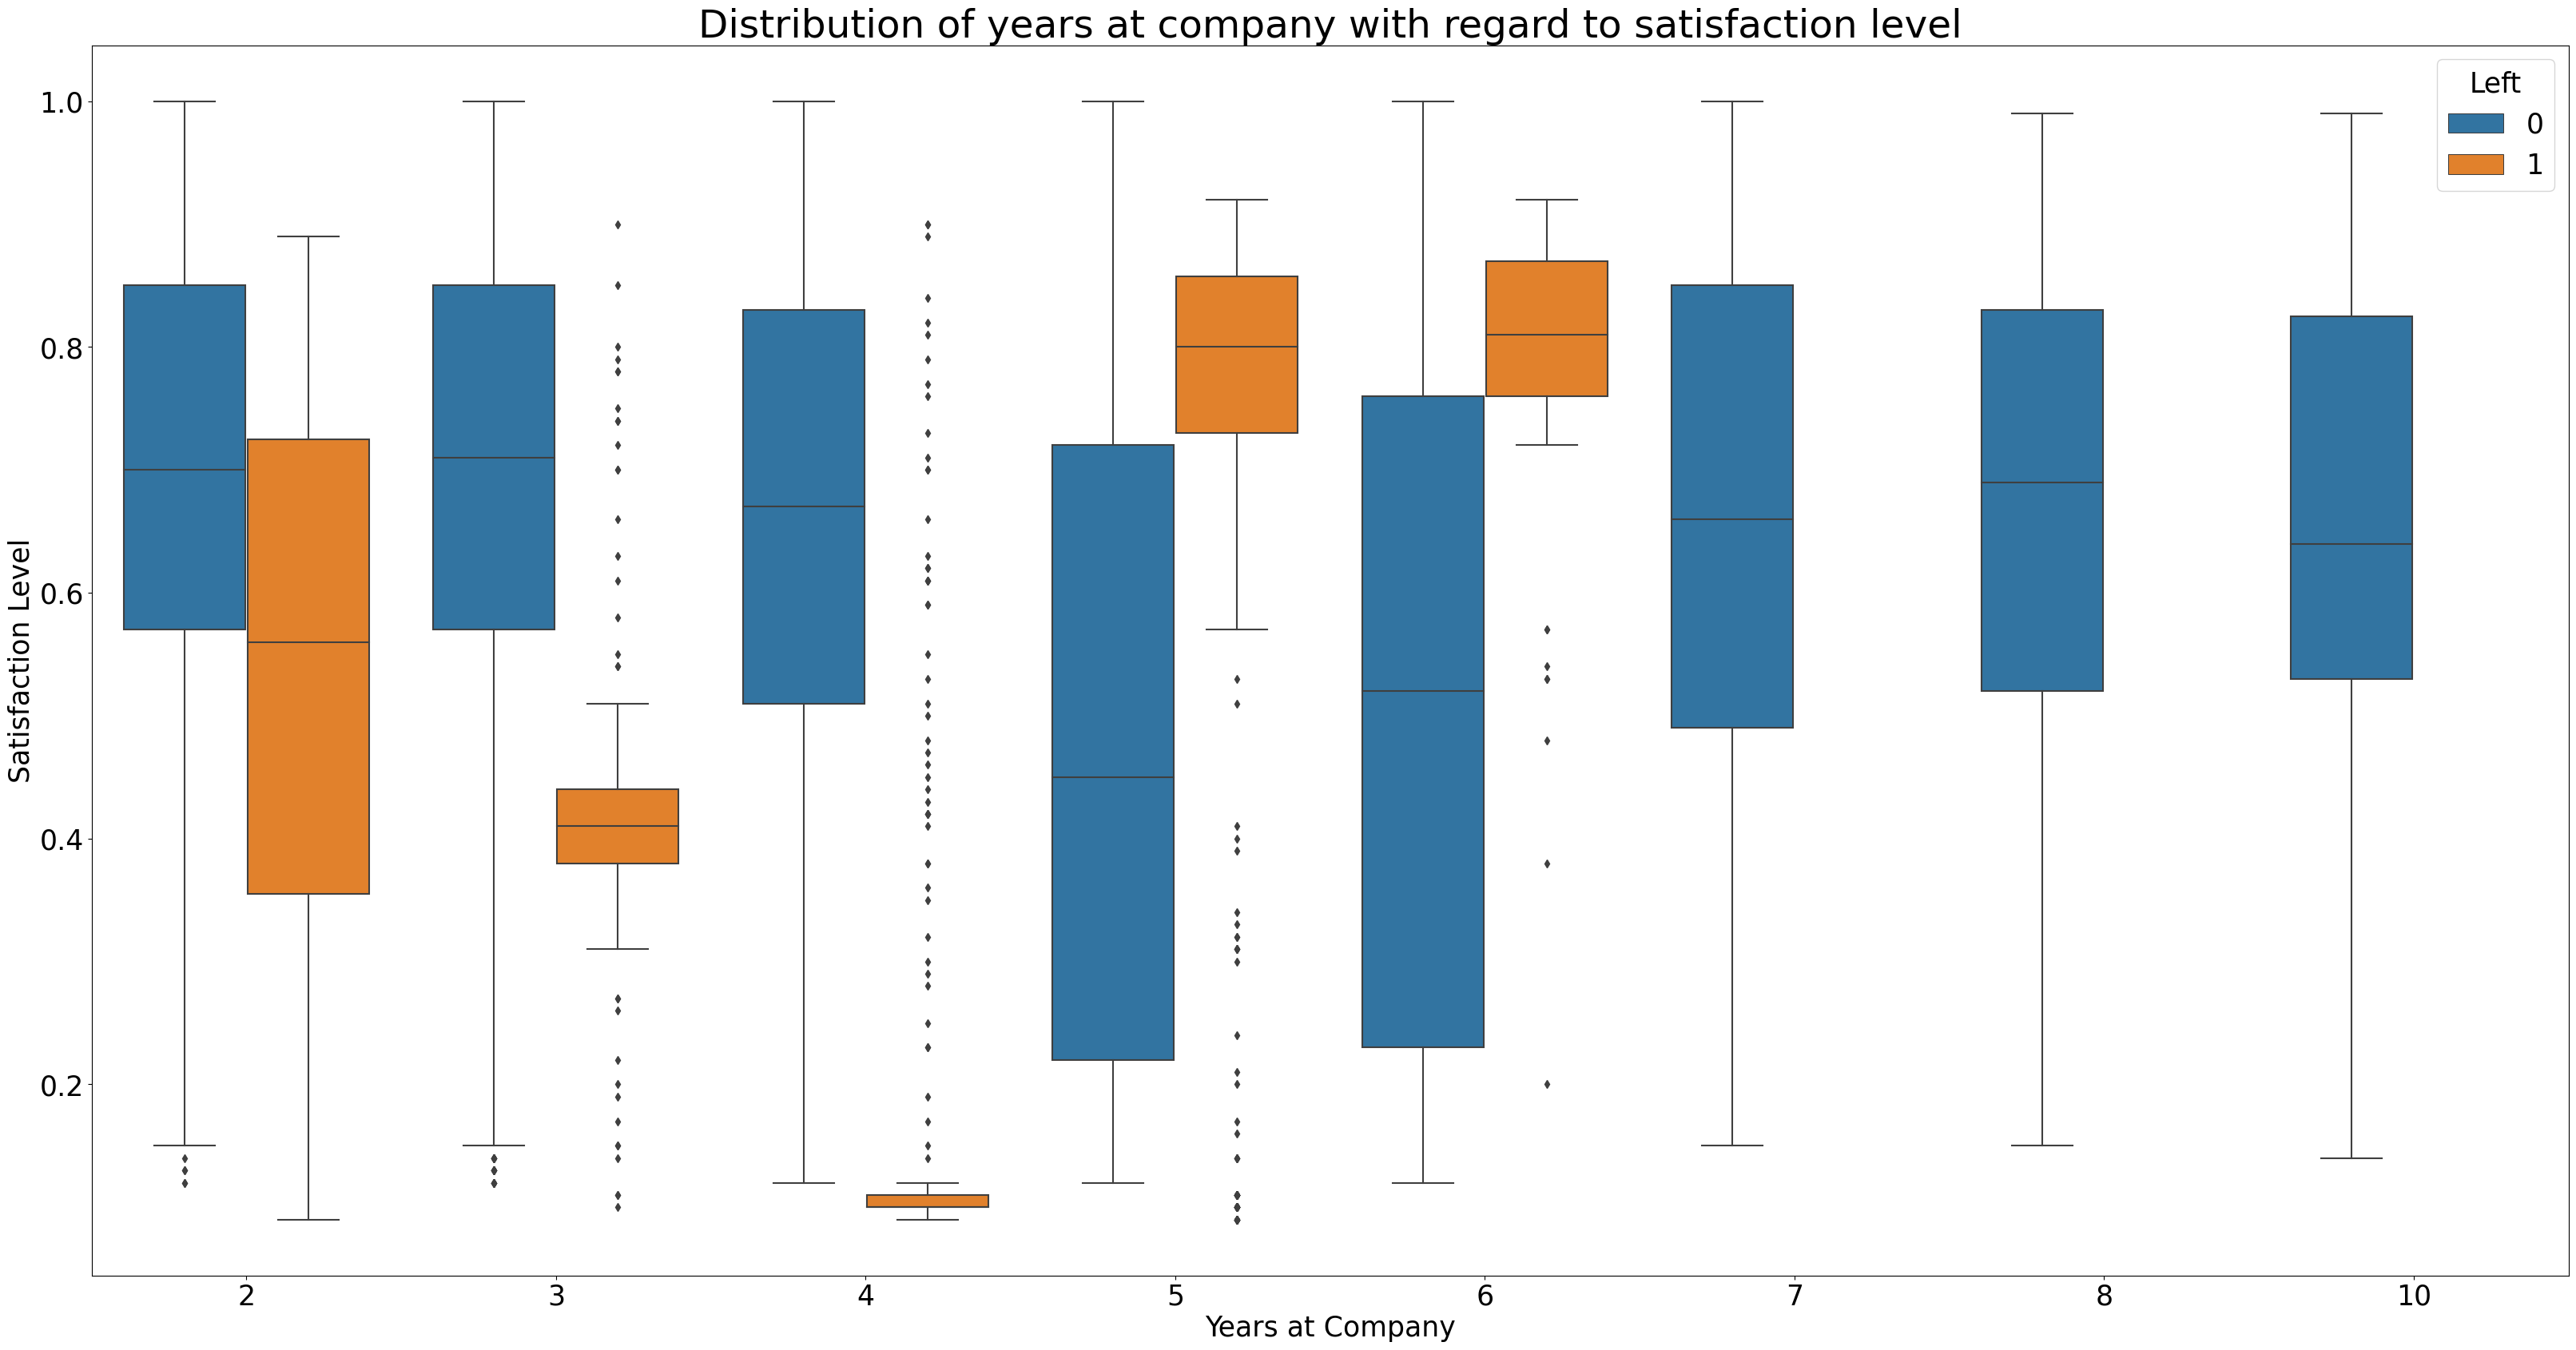

In [20]:
fig = plt.figure(figsize = (40,20))

sns.boxplot(x=df2['years_at_company'], 
            y=df2['satisfaction_level'], 
            hue= df2['left_company'])
plt.title('Distribution of years at company with regard to satisfaction level', fontsize=35)
plt.xlabel('Years at Company', fontsize=25)
plt.ylabel('Satisfaction Level', fontsize=25)
plt.xticks(horizontalalignment='center', fontsize=25)
plt.yticks(horizontalalignment='right', fontsize=25)
plt.legend(title='Left', title_fontsize=25, fontsize=25)
plt.show()

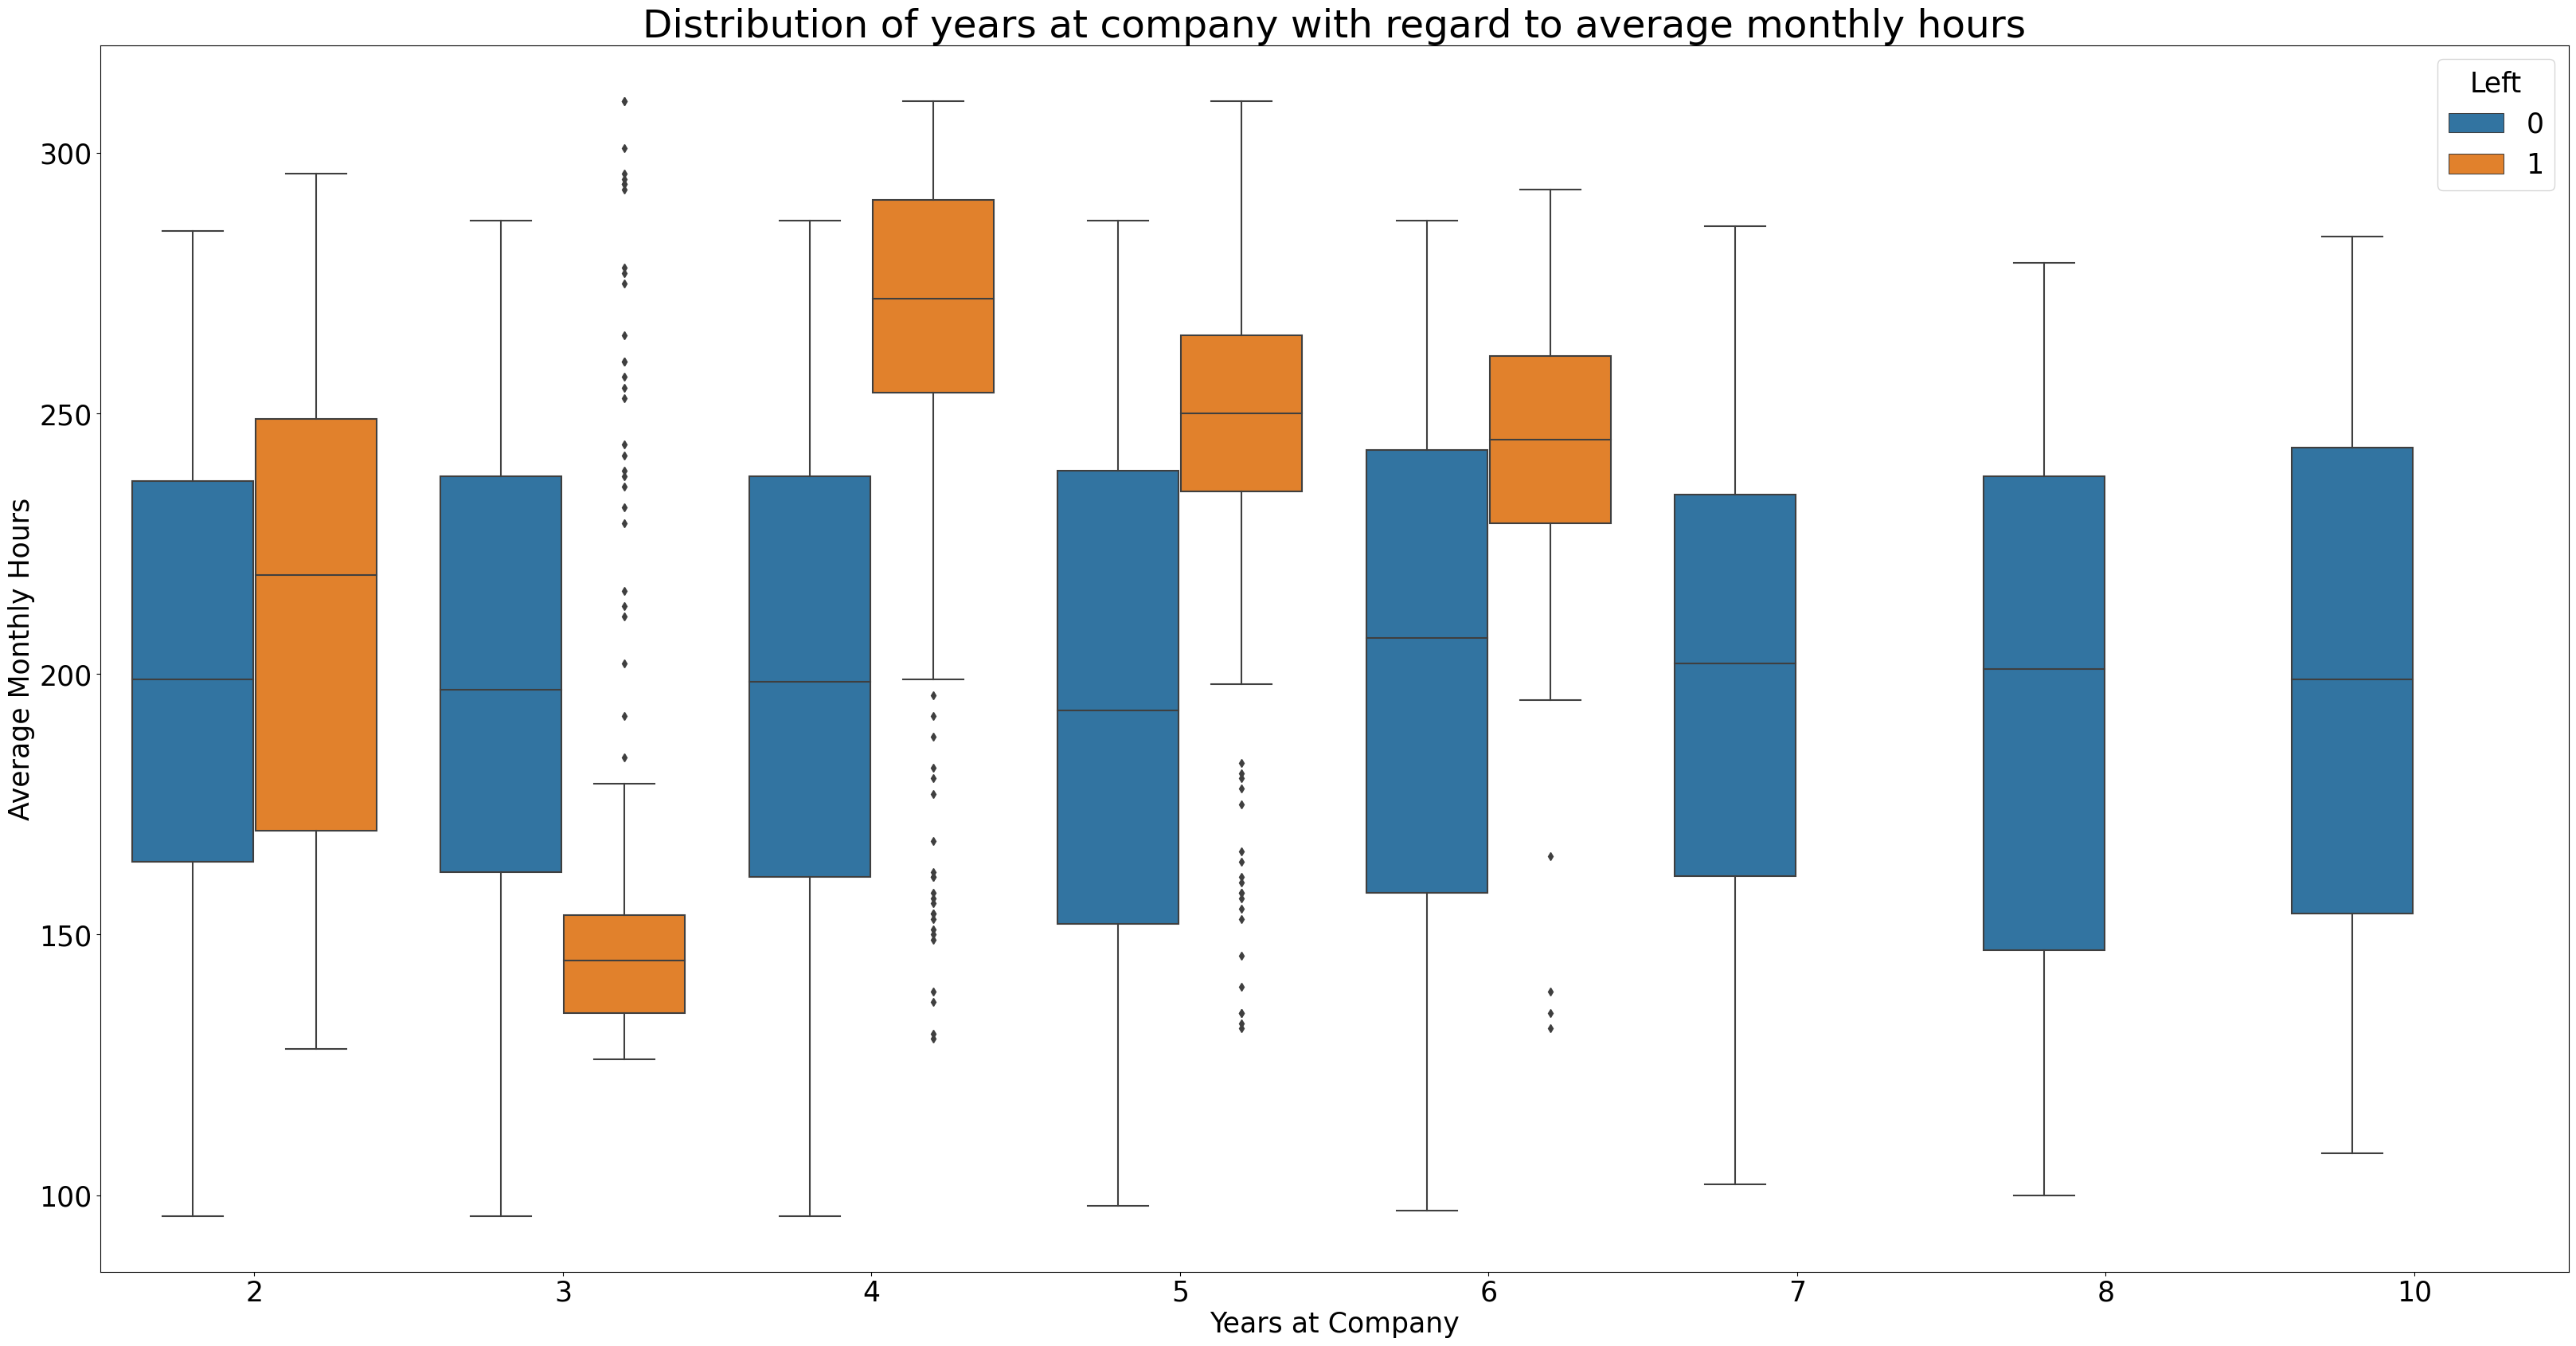

In [21]:
fig = plt.figure(figsize = (40,20))

sns.boxplot(x=df2['years_at_company'], 
            y=df2['avg_monthly_hours'], 
            hue= df2['left_company'])
plt.title('Distribution of years at company with regard to average monthly hours', fontsize=35)
plt.xlabel('Years at Company', fontsize=25)
plt.ylabel('Average Monthly Hours', fontsize=25)
plt.xticks(horizontalalignment='center', fontsize=25)
plt.yticks(horizontalalignment='right', fontsize=25)
plt.legend(title='Left', title_fontsize=25, fontsize=25)
plt.show()

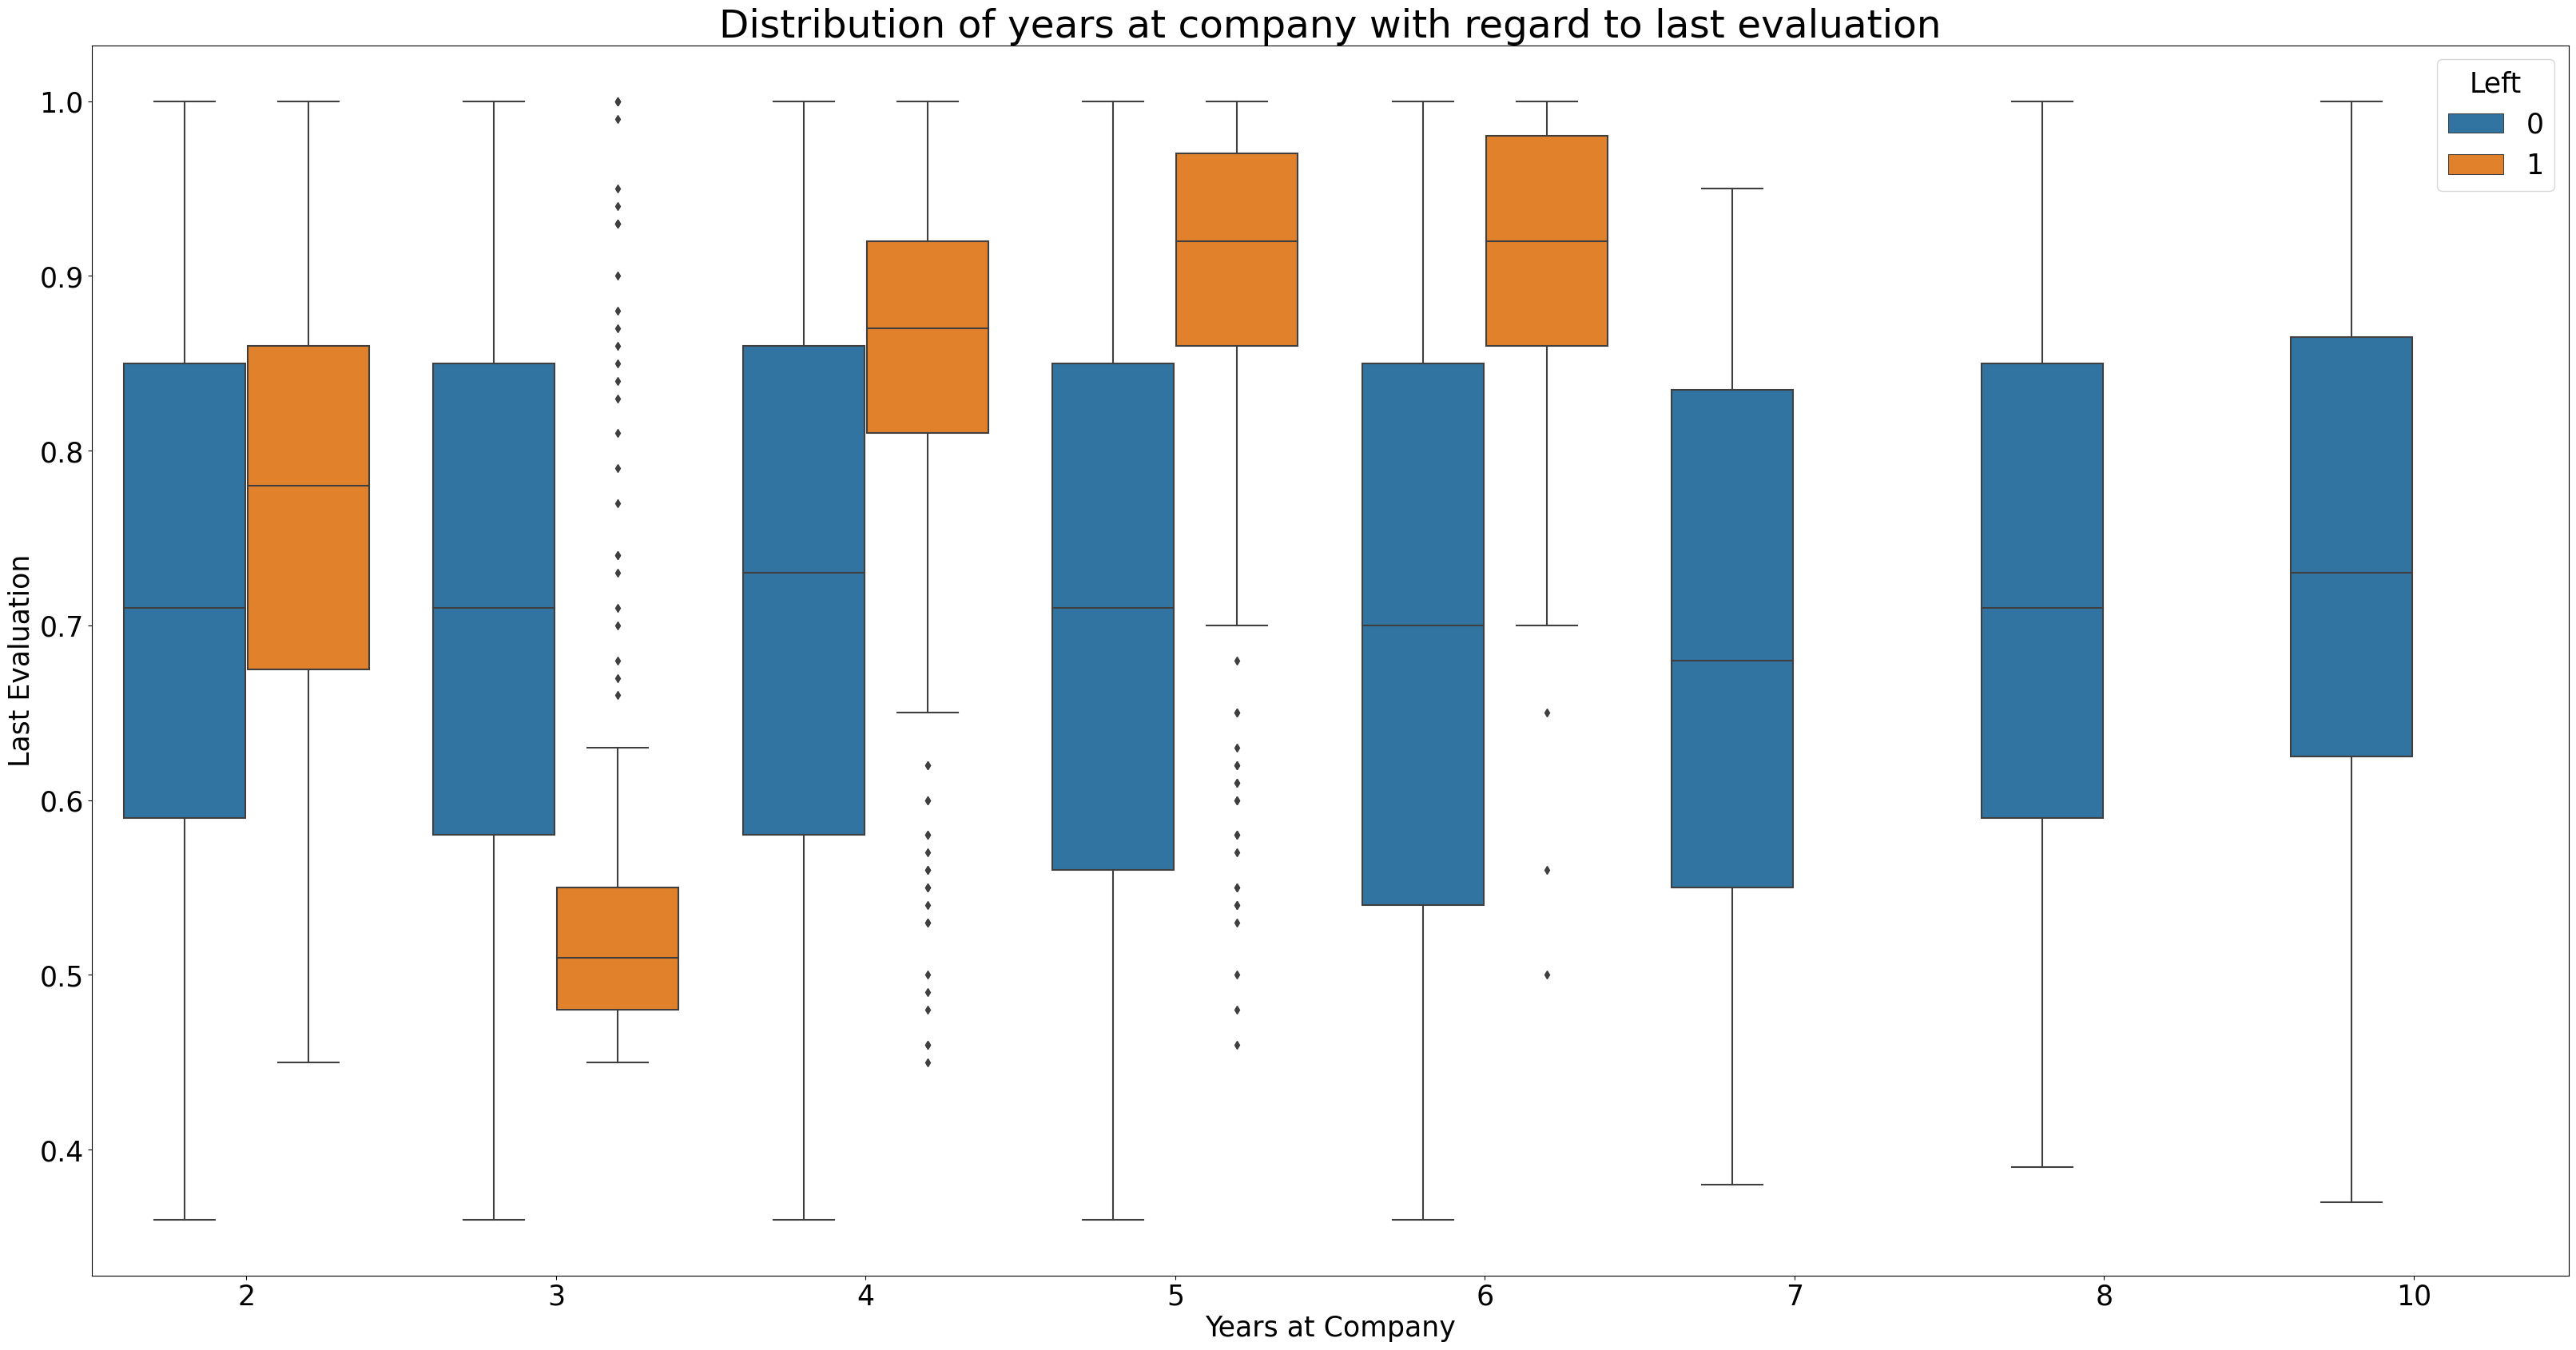

In [22]:
fig = plt.figure(figsize = (40,20))

sns.boxplot(x=df2['years_at_company'], 
            y=df2['last_evaluation'], 
            hue= df2['left_company'])
plt.title('Distribution of years at company with regard to last evaluation', fontsize=35)
plt.xlabel('Years at Company', fontsize=25)
plt.ylabel('Last Evaluation', fontsize=25)
plt.xticks(horizontalalignment='center', fontsize=25)
plt.yticks(horizontalalignment='right', fontsize=25)
plt.legend(title='Left', title_fontsize=25, fontsize=25)
plt.show()

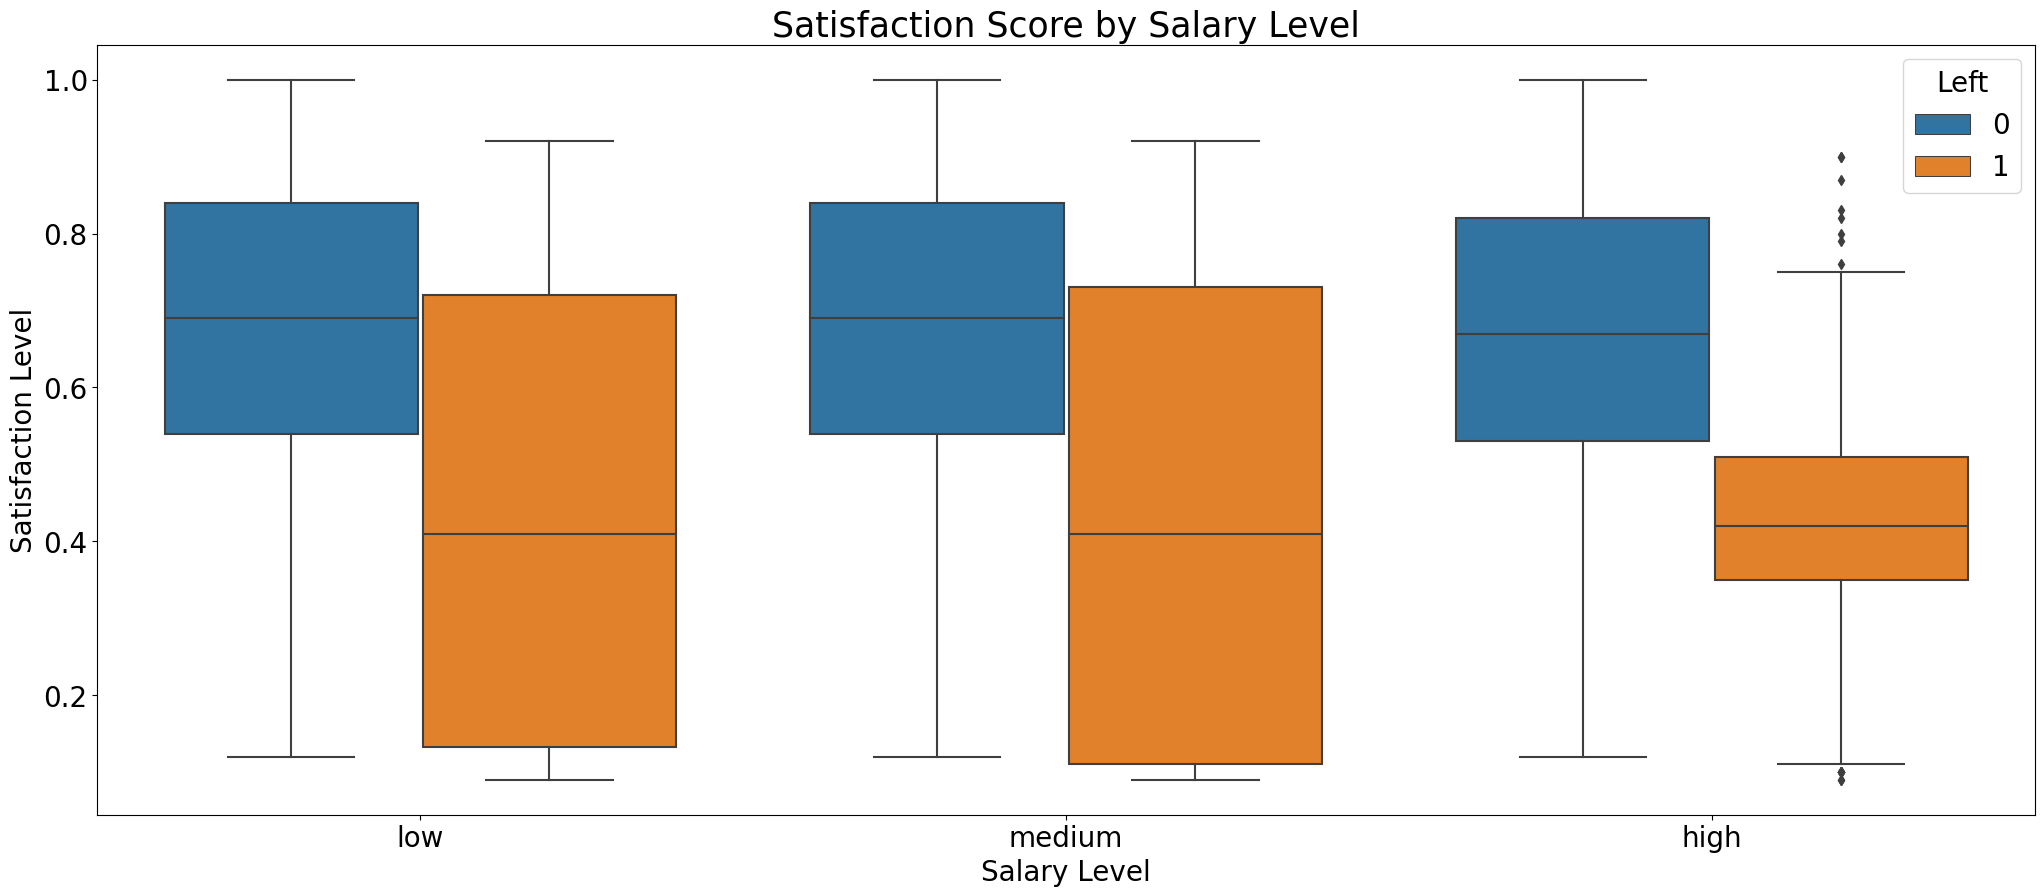

In [23]:
fig = plt.figure(figsize = (25,10))

sns.boxplot(x=df2['salary_level'], 
            y=df2['satisfaction_level'], 
            hue= df2['left_company'])
plt.title('Satisfaction Score by Salary Level', fontsize=25)
plt.xlabel('Salary Level', fontsize=20)
plt.ylabel('Satisfaction Level', fontsize=20)
plt.xticks(horizontalalignment='center', fontsize=20)
plt.yticks(horizontalalignment='right', fontsize=20)
plt.legend(title='Left', title_fontsize=20, fontsize=20)
plt.show()

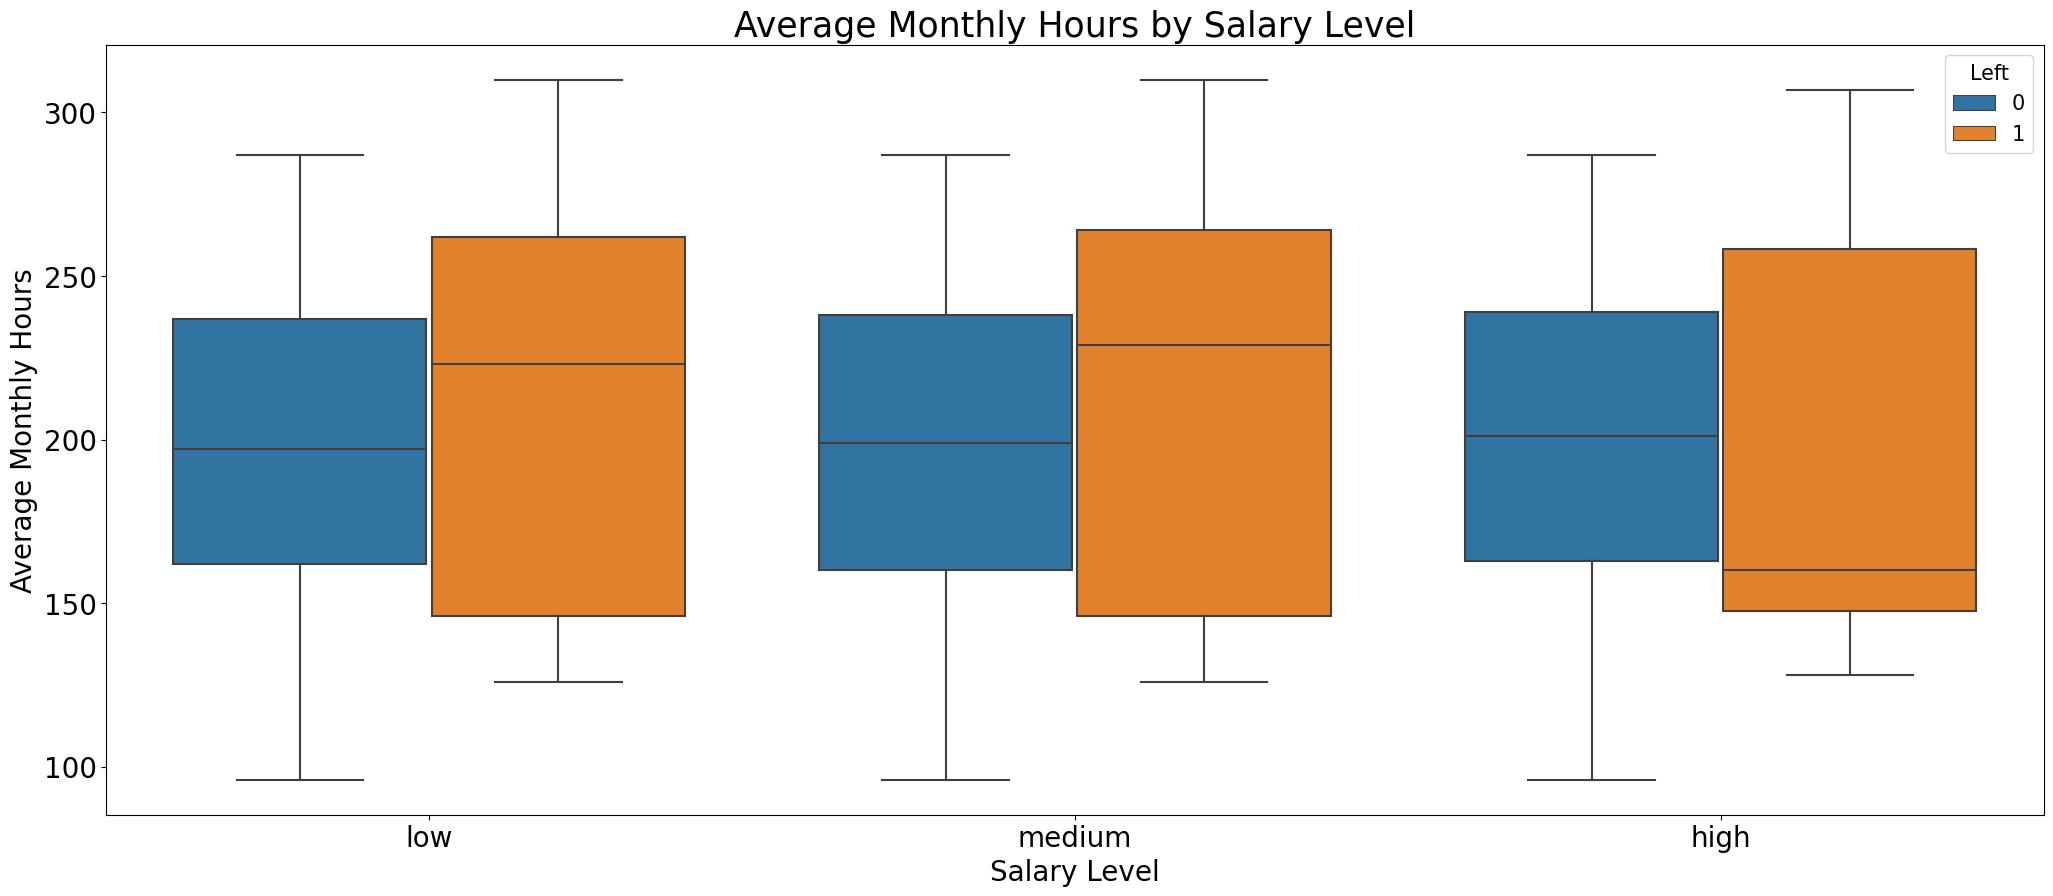

In [24]:
fig = plt.figure(figsize = (25,10))

sns.boxplot(x=df2['salary_level'], 
            y=df2['avg_monthly_hours'], 
            hue= df2['left_company'])
plt.title('Average Monthly Hours by Salary Level', fontsize=25)
plt.xlabel('Salary Level', fontsize=20)
plt.ylabel('Average Monthly Hours', fontsize=20)
plt.xticks(horizontalalignment='center', fontsize=20)
plt.yticks(horizontalalignment='right', fontsize=20)
plt.legend(title='Left', title_fontsize=15, fontsize=15)
plt.show()

In [25]:
# Correlations between variables

df2.corr()

/tmp/ipykernel_20/3495632463.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()


,satisfaction_level,last_evaluation,number_projects,avg_monthly_hours,years_at_company,work_accident,left_company,promoted_5years
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
number_projects,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
avg_monthly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
years_at_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
left_company,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
promoted_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


/tmp/ipykernel_20/2317103044.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df2.corr()


<Axes: >

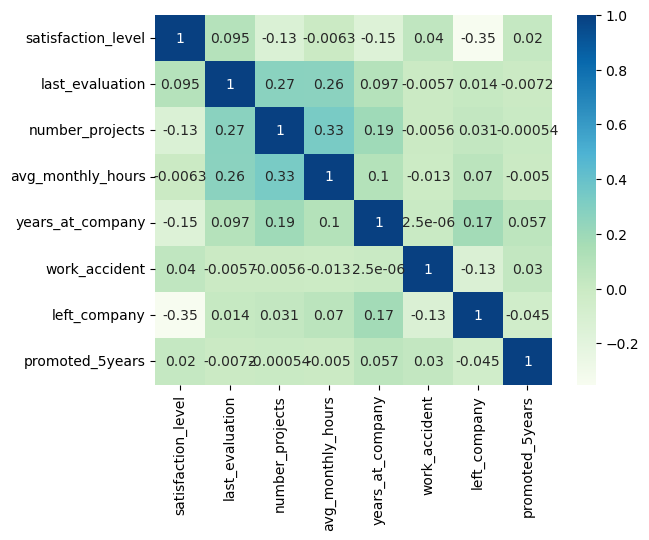

In [26]:
# Heatmap

correlation = df2.corr()
sns.heatmap(correlation, cmap = 'GnBu', annot = True)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


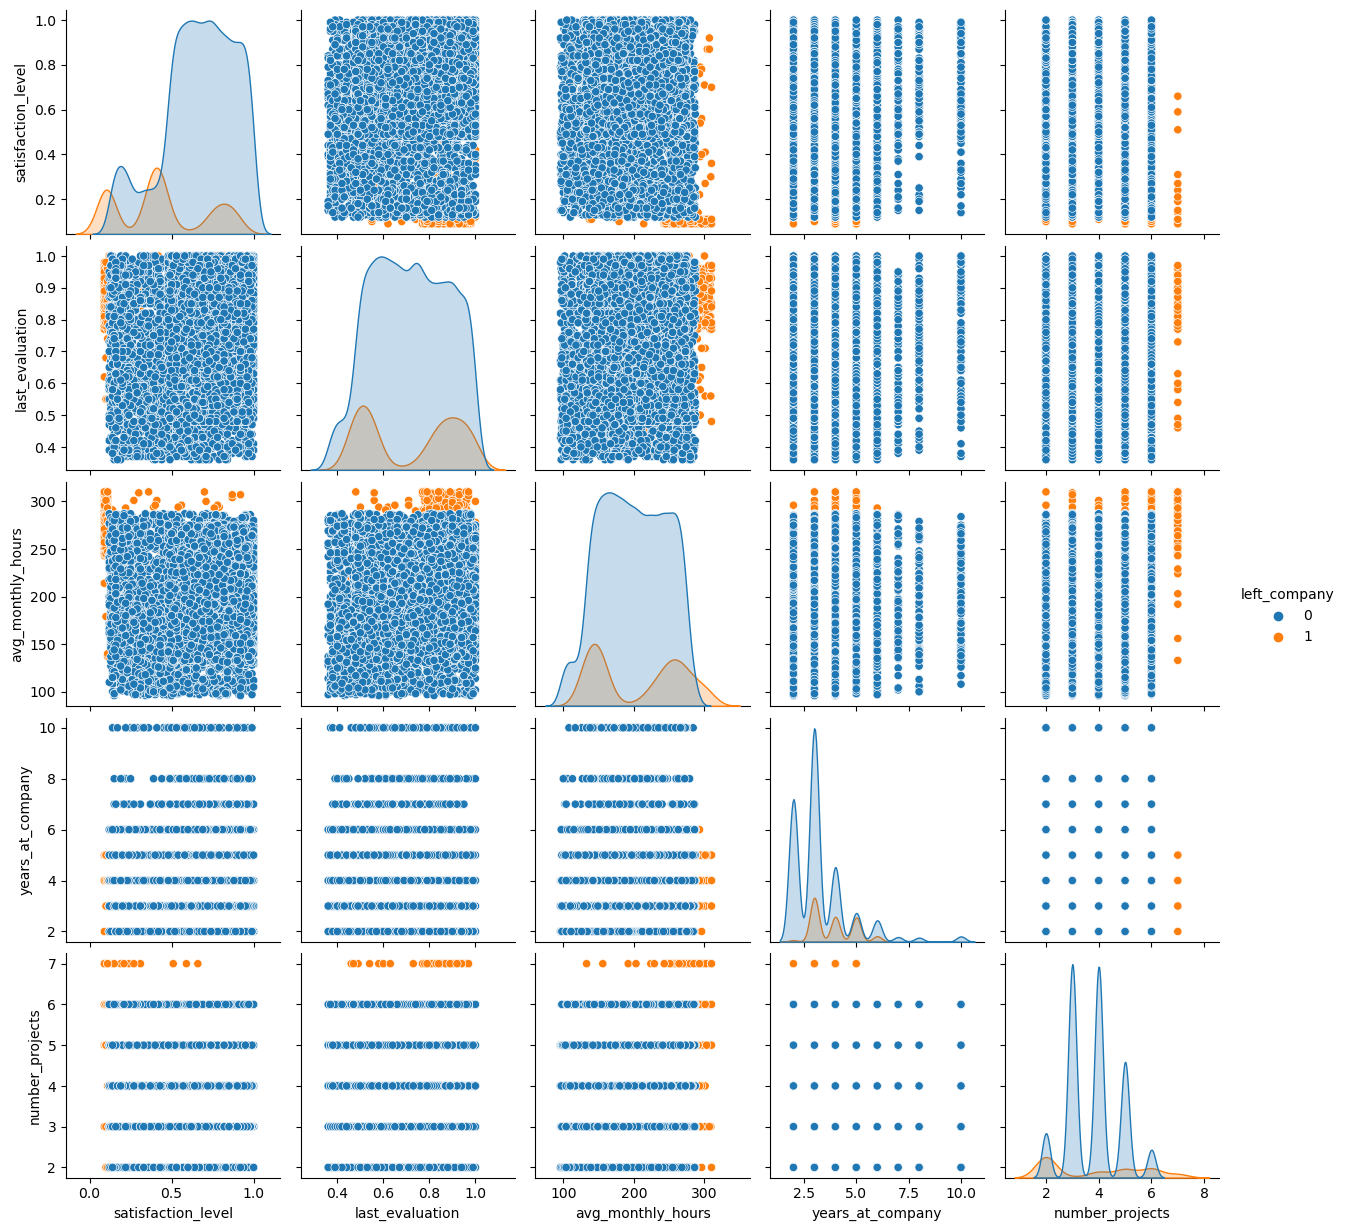

In [27]:
# Pairplot

sns.pairplot(data=df2, vars=['satisfaction_level','last_evaluation','avg_monthly_hours', 'years_at_company',
                            'number_projects'], hue='left_company')

### Insights


* Out of a total of 11,991 employees, 83.40% (10,000) stayed and 16.60% (1,991) left the company.

* The people who left had a lower satisfaction level (mean of 0.44 vs. 0.67 for those who stayed), probably because they worked longer hours (mean of 208.16 hours per month, vs. 198.94 for those who stayed). Most of them (92.95%) had 3, 4 or 5 years working at the company.<br>

* If we assume 40 hours a week as standard, with 50 weeks a year, the average montlhy hours is about 166.67 hours. The employees in this company worked considerable more hours.<br>

* 43.89% of the total employees who left (874 people) had 3 years working at the company. This group had a below average last evaluation (0.52), handled the lowest amount of projects (2.11) and worked the lowest amount of hours per month (147.47). We need to do more research to find out what happened when people reached 3 years of employment, why the percentage who left was so high, and why the employees who left had a below average performance.<br>

* 24.86% of the total employees who left (495 people) had 4 years working at the company. This group handled in average the highest number of projects (5.9) and worked the longest number of hours (268.8, 13.44 hours a day). Although they had the third highest evaluation score (0.85) they had the lowest satisfaction level (0.14).<br>

* 24.20% of the total employees who left (482 people) had 5 years working for the company. This group worked the second longest number of hours per month (248.15 per month, 12.41 hours a day) and handle a high number of projects (4.76). Although they had the second highest evaluation score (0.89) they decided to leave the company anyway (0.14 satisfaction level).<br>

* It seems that for the employers who had 3 years working at the company, mostly underperformers left. But the people who left and had 4 and 5 working at the company left because they were being overworked.<br>

* The people with longer tenure (7, 8 and 10 years) didn't leave.<br>

* Departments doesn't seem to be a good predictor for tenure.<br>

* From the heatmap we can see that last evaluation, average number of hours and number of projects are somewhat positively correlated. The variables left company and satisfaction level have some negative correlation<br>

* For the group who had a promotion in the last 5 years, only 8 left (0.07% of all employees who left).<br>

* For the group who had a work accident, 105 people left (0.88% of all employes who left).<br>

* The higher the salary level the fewer people leave the company. The people who left showed lower satisfaction and higher working hours per month across all salary levels (low, medium and high).

* The most important variables seem to be: Satisfaction level, number of projects, average monthly hours, last evaluation and years at company.

## Step 3. Model Building

### Modeling

In [28]:
# Check data types

df2.dtypes

satisfaction_level    float64
last_evaluation       float64
number_projects         int64
avg_monthly_hours       int64
years_at_company        int64
work_accident           int64
left_company            int64
promoted_5years         int64
department             object
salary_level           object
dtype: object

In [29]:
# Convert Department (from categorical to numeric)

df2_dummies = pd.get_dummies(df2, columns=['department'],drop_first=True)

In [30]:
# Hot encoding Salary Level

df2_dummies['salary_level'] = df2_dummies['salary_level'].map({'high': 2, 'medium': 1, 'low': 0})

In [31]:
df2_dummies.head()

,satisfaction_level,last_evaluation,number_projects,avg_monthly_hours,years_at_company,work_accident,left_company,promoted_5years,salary_level,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0


### Model A. Logistic Regression

In [32]:
# Remove outliers (logistic regression is sensitive to outliers) from years_at_company

df_logreg = df2_dummies[(df2_dummies['years_at_company']>=lower_limit) & (df2_dummies['years_at_company']<=upper_limit)]

df_logreg.head(5)

,satisfaction_level,last_evaluation,number_projects,avg_monthly_hours,years_at_company,work_accident,left_company,promoted_5years,salary_level,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,1,0,0


The logistic regression model assumptions are correct:

* Outcome variable is categorical.<br/>
* Observations are independent of each other.<br/>
* No severe multicollinearity among X variables.<br/>
* No extreme outliers.<br/>
* Linear relationship between each X variable and the logit of the outcome variable.<br/>
* Sufficiently large sample size.<br/>

In [33]:
# Select feautures for model

X = df_logreg.drop(['left_company'], axis=1)
y = df_logreg['left_company']

# Split the data into training set and testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [34]:
# Construct a logistic regression model and fit it to the training dataset

clf = LogisticRegression(max_iter=500, random_state=42)

clf.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

In [35]:
# Get predictions on the test set

y_pred = clf.predict(X_test)

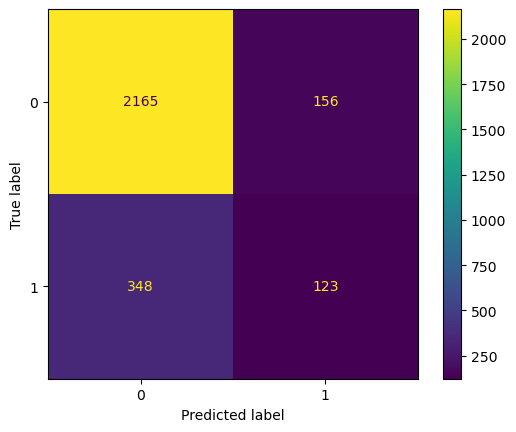

In [36]:
# Confusion matrix

cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)

log_disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)

log_disp.plot(values_format='')

plt.show()

#### Definitions

* The upper-left quadrant displays the number of true negatives.
* The upper-right quadrant displays the number of false positives.
* The bottom-left quadrant displays the number of false negatives.
* The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave but the model inaccurately predicted as leaving.

False negatives: The number of people who left but the model inaccurately predicted did not leave

True positives: The number of people who left that the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

#### Evaluation Metrics

* Precision measures the proportion of data points predicted as true that are actually true, in other words, the proportion of positive predictions that are true positives.

* Recall measures the proportion of data points that are predicted as true, out of all the data points that are actually true. In other words, it measures the proportion of positives that are correctly classified.

* Accuracy measures the proportion of data points that are correctly classified.

* F1-score is an aggregation of precision and recall.

In [37]:
df_logreg['left_company'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left_company, dtype: float64

The data is sufficiently balanced. Not perfect but it is not severely unbalanced, so we can continue with model

In [38]:
# Classification report for logistic regression model

target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



The classification report is often used in machine learning to compute the accuracy of a classification model based on the values from the confusion matrix. In our model, if we assume that it's more important to predict employees who leave, then the scores are significantly low.

### Model B. Decision Tree

In [39]:
# Select features, split data and instantiate model

df_dt = df2_dummies.copy()

y = df_dt['left_company']
X = df_dt.drop('left_company', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

decision_tree = DecisionTreeClassifier(random_state=0)

In [40]:
# Model with cross-validated hyperparameter tuning.

cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch

tree1 = GridSearchCV(decision_tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [41]:
# Fit the decision tree model to the training data

tree1.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'f1', 'roc_auc', 'recall', 'accuracy', 'precision'})

In [42]:
# Check best parameters

tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [43]:
# Check best AUC score on CV

tree1.best_score_

0.969819392792457

The ROC AUC score tells us how efficient the model is. The higher the AUC, the better the model’s performance at distinguishing between the positive and negative classes. An AUC score of 1 means the classifier can perfectly distinguish between all the Positive and the Negative class points. An AUC value of 0 shows that the classifier predicts all Negatives as Positives and vice versa.</br>

The model has a strong AUC score of 0.9698, so the model is good at predicting if an employee will leave.

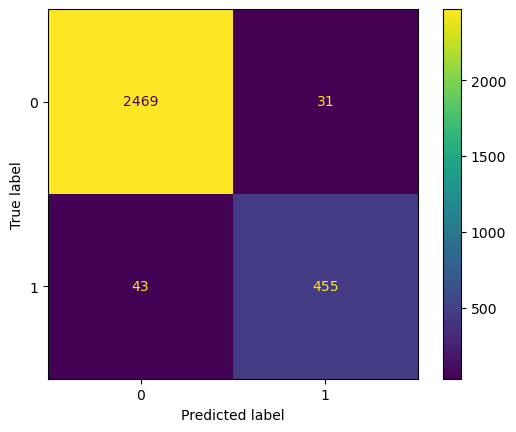

In [44]:
# Confusion matrix

preds = tree1.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=tree1.classes_)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=tree1.classes_)

disp.plot(values_format='')

In [45]:
# Extract all scores from grid search

def make_results(model_name:str, model_object, metric:str):
    
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    cv_results = pd.DataFrame(model_object.cv_results_)

    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [46]:
# Get all CV scores

tree1_cv_results = make_results('decision tree cv', tree1, 'auc')

tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.914552,0.916949,0.915707,0.971978,0.969819


These are good performance scores. Decision tree models tend to overfit, so we'll try a Random Forest model next.

For exploratory purpose, we will inspect the splits of the decision tree model and its most important features.

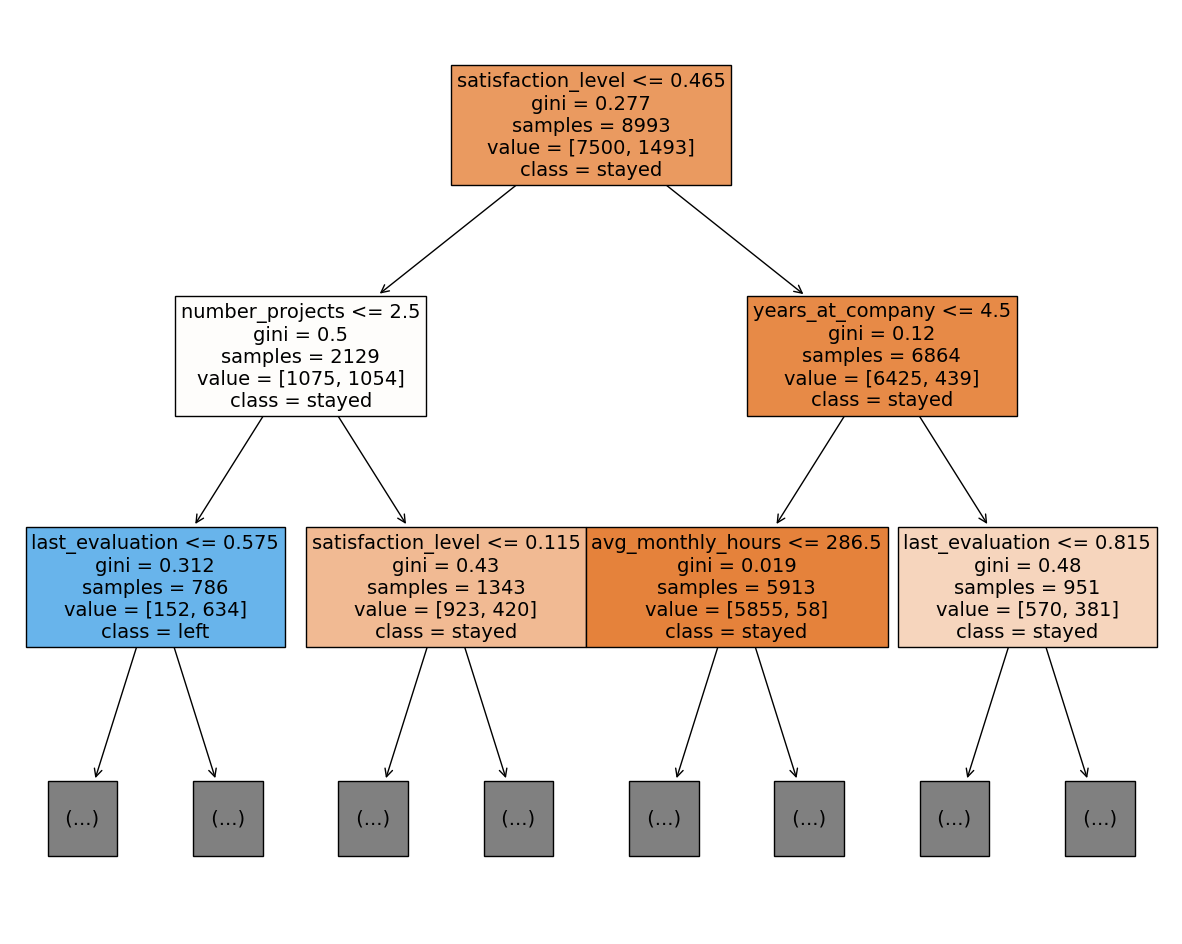

In [47]:
# Plot the decision tree

plt.figure(figsize=(15,12))
plot_tree(tree1.best_estimator_, max_depth=2, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True)

plt.show()

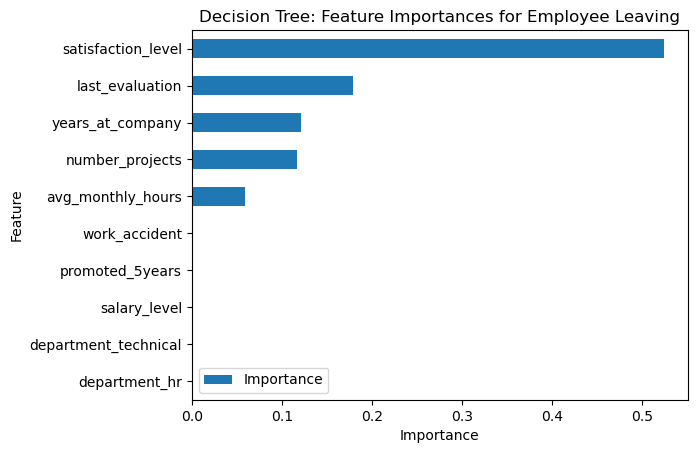

In [48]:
# Plot the feature importances for the tree decision model

# Get feature importances

feat_impt = tree1.best_estimator_.feature_importances_

# Get indices of top 10 features

ind = np.argpartition(tree1.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features

feat = X.columns[ind]

# Filter 'feat_impt' to consist of top 10 feature importances

feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")

fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

### Model C. Random Forest

In [49]:
# Determine set of hyperparameters

cv_params = {'n_estimators' : [50,100], 
              'max_depth' : [7,10],        
              'min_samples_leaf' : [1,2], 
              'min_samples_split' : [0.001],
              'max_features' : [3,4], 
              'max_samples' : [0.5,0.9]}

rf = RandomForestClassifier(random_state=0)

scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch

rf_val = GridSearchCV(rf, cv_params, cv=5, scoring=scoring, refit='roc_auc')

In [50]:
# Fit the random forest model to the training data

rf_val.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [7, 10], 'max_features': [3, 4],
                         'max_samples': [0.5, 0.9], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [0.001],
                         'n_estimators': [50, 100]},
             refit='roc_auc',
             scoring={'f1', 'roc_auc', 'recall', 'accuracy', 'precision'})

In [51]:
# Get best parameters

rf_val.best_params_

{'max_depth': 10,
 'max_features': 4,
 'max_samples': 0.9,
 'min_samples_leaf': 2,
 'min_samples_split': 0.001,
 'n_estimators': 100}

In [52]:
# Check best AUC score on CV

rf_val.best_score_

0.9800902366576134

The AUC score (0.9801) is better than the one for the decision tree model (0.9698).

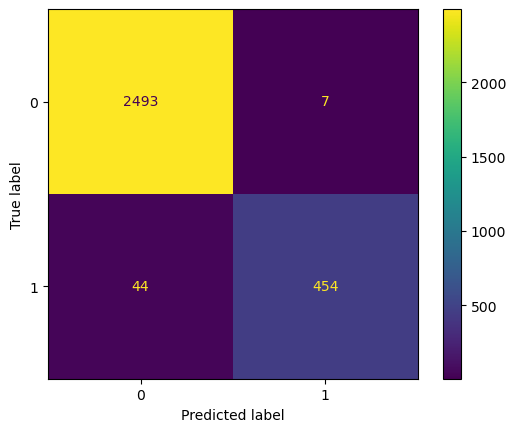

In [53]:
# Confusion matrix

preds = rf_val.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf_val.classes_)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_val.classes_)

disp.plot(values_format='')

In [54]:
# Create model results table

rf_val_results = make_results('Random Forest Validated', rf_val, 'auc')

In [55]:
# Concatentate model results tables

results = pd.concat([tree1_cv_results, rf_val_results])

# Sort master results by AUC score in descending order

results.sort_values(by=['auc'], ascending=False)

,model,precision,recall,F1,accuracy,auc
0,Random Forest Validated,0.984051,0.908231,0.944599,0.982319,0.980090
0,decision tree cv,0.914552,0.916949,0.915707,0.971978,0.969819


The random forest model outperforms the decision tree model. The evaluation scores of the random forest model are better than those of the decision tree model, with the exception of recall (the recall score of the random forest model is approximately 0.009 lower, which is a negligible amount).

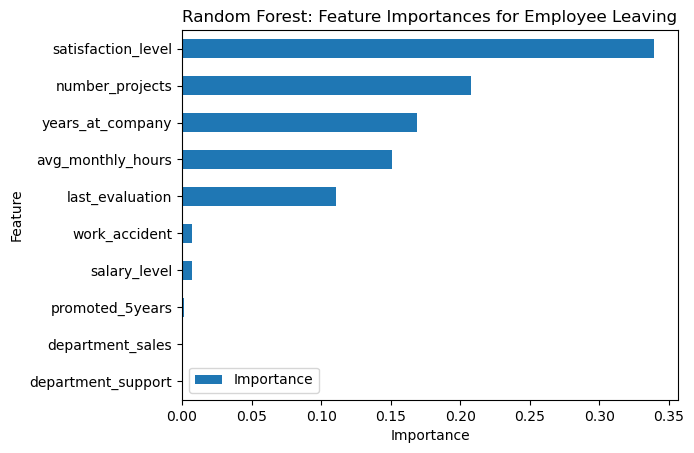

In [56]:
# Plot the feature importances for the random forest model

# Get feature importances

feat_impt = rf_val.best_estimator_.feature_importances_

# Get indices of top 10 features

ind = np.argpartition(rf_val.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 

feat = X.columns[ind]

# Filter 'feat_impt' to consist of top 10 feature importances

feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

Variables 'satisfaction_level', 'number_projects', 'years_at_company', 'avg_monthly_hours' and 'last evaluation' have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, 'left_company'. 

## Step 4. Results and evaluation

### Summary of model results

We ran three models: Logistic Regression, Tree Decision and Random Forest.

The random forest model had the higher scores with an AUC of 98%, precision of 98.41%, recall of 90.82%, F1-score of 94.46%, and accuracy of 98.23%. 

Variables 'satisfaction_level', 'number_projects', 'years_at_company', 'avg_monthly_hours' and 'last evaluation' had the highest importance, in that order. These variables are most helpful in predicting the outcome variable, 'left_company'. 


### Conclusion, Recommendations, Next Steps

Most people who left seemed to be overworked with a high number of projects and long working hours. Although they tended to have good last evaluations, they decided to leave anyway. Most of these employees had 3, 4 or 5 years working at Salifort.

Recommendations:

* Explain the company culture to new employees so they have better expectations when starting to work at Salifort. Hold meetings and discussions accross the company to adress management expectations in terms of projects and working hours. 
* To retain more employees, consider improving employees' life work balance by cutting down the number of projects and required working hours.
* Pay special attention to employees with a tenure of 3, 4 and 5 years since 92% of all employees who left were at that mark.  
* High evaluations seemed to be given to employees who work long hours. Maybe the company is reinforcing that working long hours is positive behavior. 
* Increase promotions among employees, very few people who had a promotion left the company.

Next Steps: 

* More research is needed for employees with 3 years working at the company. As mentioned before this group had a below average last evaluation (0.52), handled the lowest amount of projects (2.11) and worked the lowest amount of hours per month (147.47) of any other tenure group. A cluster analysis with a K-means model could be benefitial to better understand these groups.

* If satisfaction surveys are not done often, then we could consider running the models after dropping this variable. The same can be done for last evaluation.